### PAPER's Figure 5

In [145]:
#############################################
#BASIC PACKAGES
import sys,time,os
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import cross_functions_simulations as cxfs
# it's required healpy  (https://healpy.readthedocs.io/en/latest/index.html)
import handling_data               as hdata

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
#from matplotlib.colors import LogNorm
#from matplotlib.ticker import LogLocator
from matplotlib.colors import ListedColormap
colors = ['#ff0000', "#41b6c4",  "olivedrab", "darkviolet"]
my_cmap = ListedColormap(colors, name="my_cmap")
font_dict = {'family': 'serif', 'color':  None,  'weight': 'bold','size': 30}


In [146]:
timej  = time.time() 
###############################################################################################
prefix = 'lowz_nch30_980_1260'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns2','ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    L0_dir         = "sim0"
    W_fg_rec       = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#[1:,:]
    W_fg_rec_mean  = np.loadtxt(os.path.join(dirpath_rec, 'mean' ,'filter_fg_mean.txt' )).T#[1:,:]
    if not i:
        WFG_dict_lowz = {ICs: {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean} }
    else:
        WFG_dict_lowz[ICs] = {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean}  
    del W_fg_rec,W_fg_rec_mean
###############################################################################################
prefix = 'highz_nch70_350_1050'
dirpath_out = '/data/AMARINS/CMBWLxHI-DATA/postprocessed/fullsky/{}'.format(prefix)
for i,ICs in enumerate(['ns2','ns3','ns4','ns5']):   
    dirpath_out_ns = os.path.join(dirpath_out,ICs)
    dirpath_rec    = os.path.join(dirpath_out_ns,'estimated')
    L0_dir         = "sim0"
    W_fg_rec       = np.loadtxt(os.path.join(dirpath_rec, L0_dir ,'filter_fg.txt' )).T#[1:,:]
    W_fg_rec_mean  = np.loadtxt(os.path.join(dirpath_rec, 'mean' ,'filter_fg_mean.txt' )).T#[1:,:]
    if not i:
        WFG_dict_highz = {ICs: {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean} }
    else:
        WFG_dict_highz[ICs] = {'W_fg_rec':W_fg_rec,'W_fg_rec_mean':W_fg_rec_mean}  
    del W_fg_rec,W_fg_rec_mean
###############################################################################################
print('Processing time: {0:.4f} seg'.format(time.time()-timej))      

Processing time: 0.0073 seg


'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png'

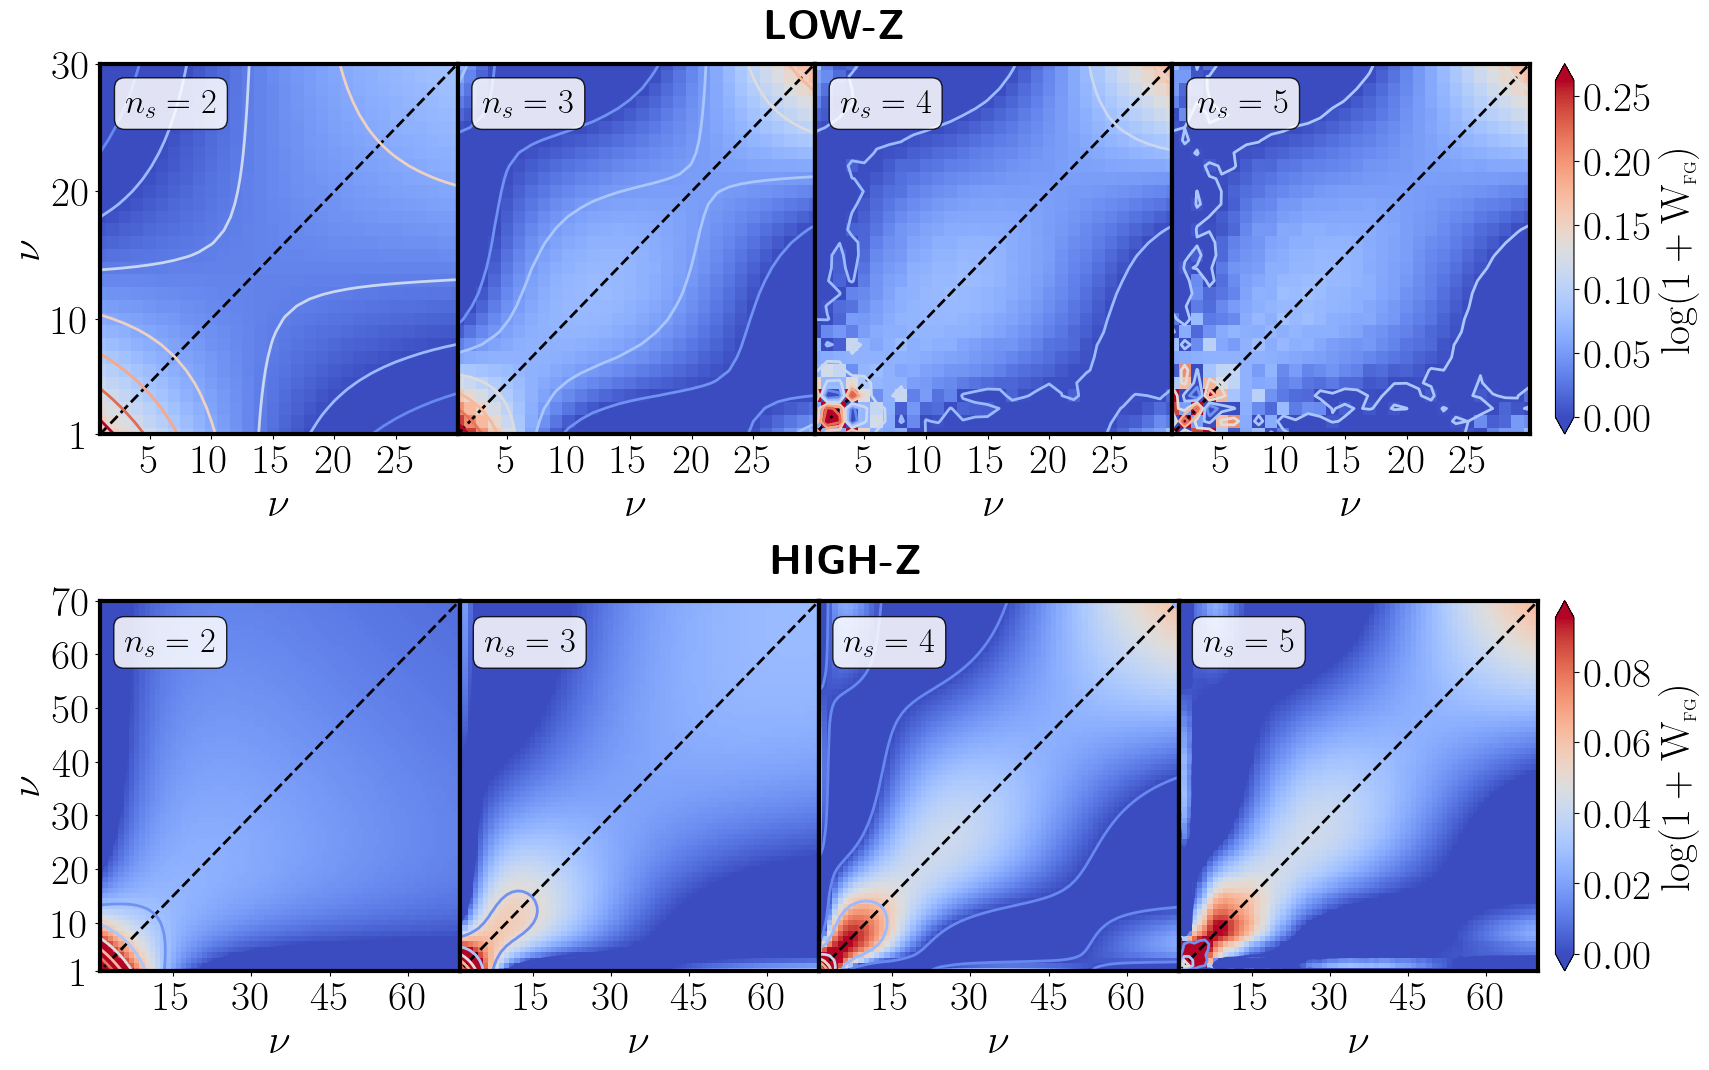

In [198]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.7, wspace=0.0,hspace=0.45)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
bwidth=3
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.3))
    ax.plot(np.arange(iWfg.shape[0])+1,np.arange(iWfg.shape[0])+1, color='black',lw=2,ls='--')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks(cticks)
    ax.tick_params(axis='x', labelsize=30)
    #ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth)     
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.text(x=3, y=26.2, s=r'$n_s = '+ins.split('ns')[1]+'$', fontdict={'family': 'serif', 'color':  'black',  'weight': 'bold','size': 25}, 
                                                                bbox= {'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round',  'alpha':0.85})
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0,0.05,0.10,0.15,0.20,0.25]
cbar = plt.colorbar(im, ax=axes[0,:],ticks=cbticks,
                    extend='both',shrink=1.,pad=0.015,aspect=20, location="right")
cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0,0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
ax.set_yticks([1,10,20,30])
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0,0].text(x=55, y=32, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [15,30,45,60]
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.1))
    ax.plot(np.arange(iWfg.shape[0])+1,np.arange(iWfg.shape[0])+1, color='black',lw=2,ls='--')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks(cticks)
    ax.tick_params(axis='x', labelsize=30)
    #ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth) 
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.text(x=5.6, y=60.6, s=r'$n_s = '+ins.split('ns')[1]+'$', fontdict={'family': 'serif', 'color':  'black',  'weight': 'bold','size': 25}, 
                                                                bbox= {'facecolor': 'white', 'edgecolor': 'black', 'boxstyle': 'round',  'alpha':0.85})
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0,0.02,0.04,0.06,0.08,0.1]
cbar = plt.colorbar(im, ax=axes[1,:],ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[1,0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
ax.set_yticks([1,10,20,30,40,50,60,70])
ax.set_ylabel( r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[1,0].text(x=130, y=75, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png"
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_model1.png'

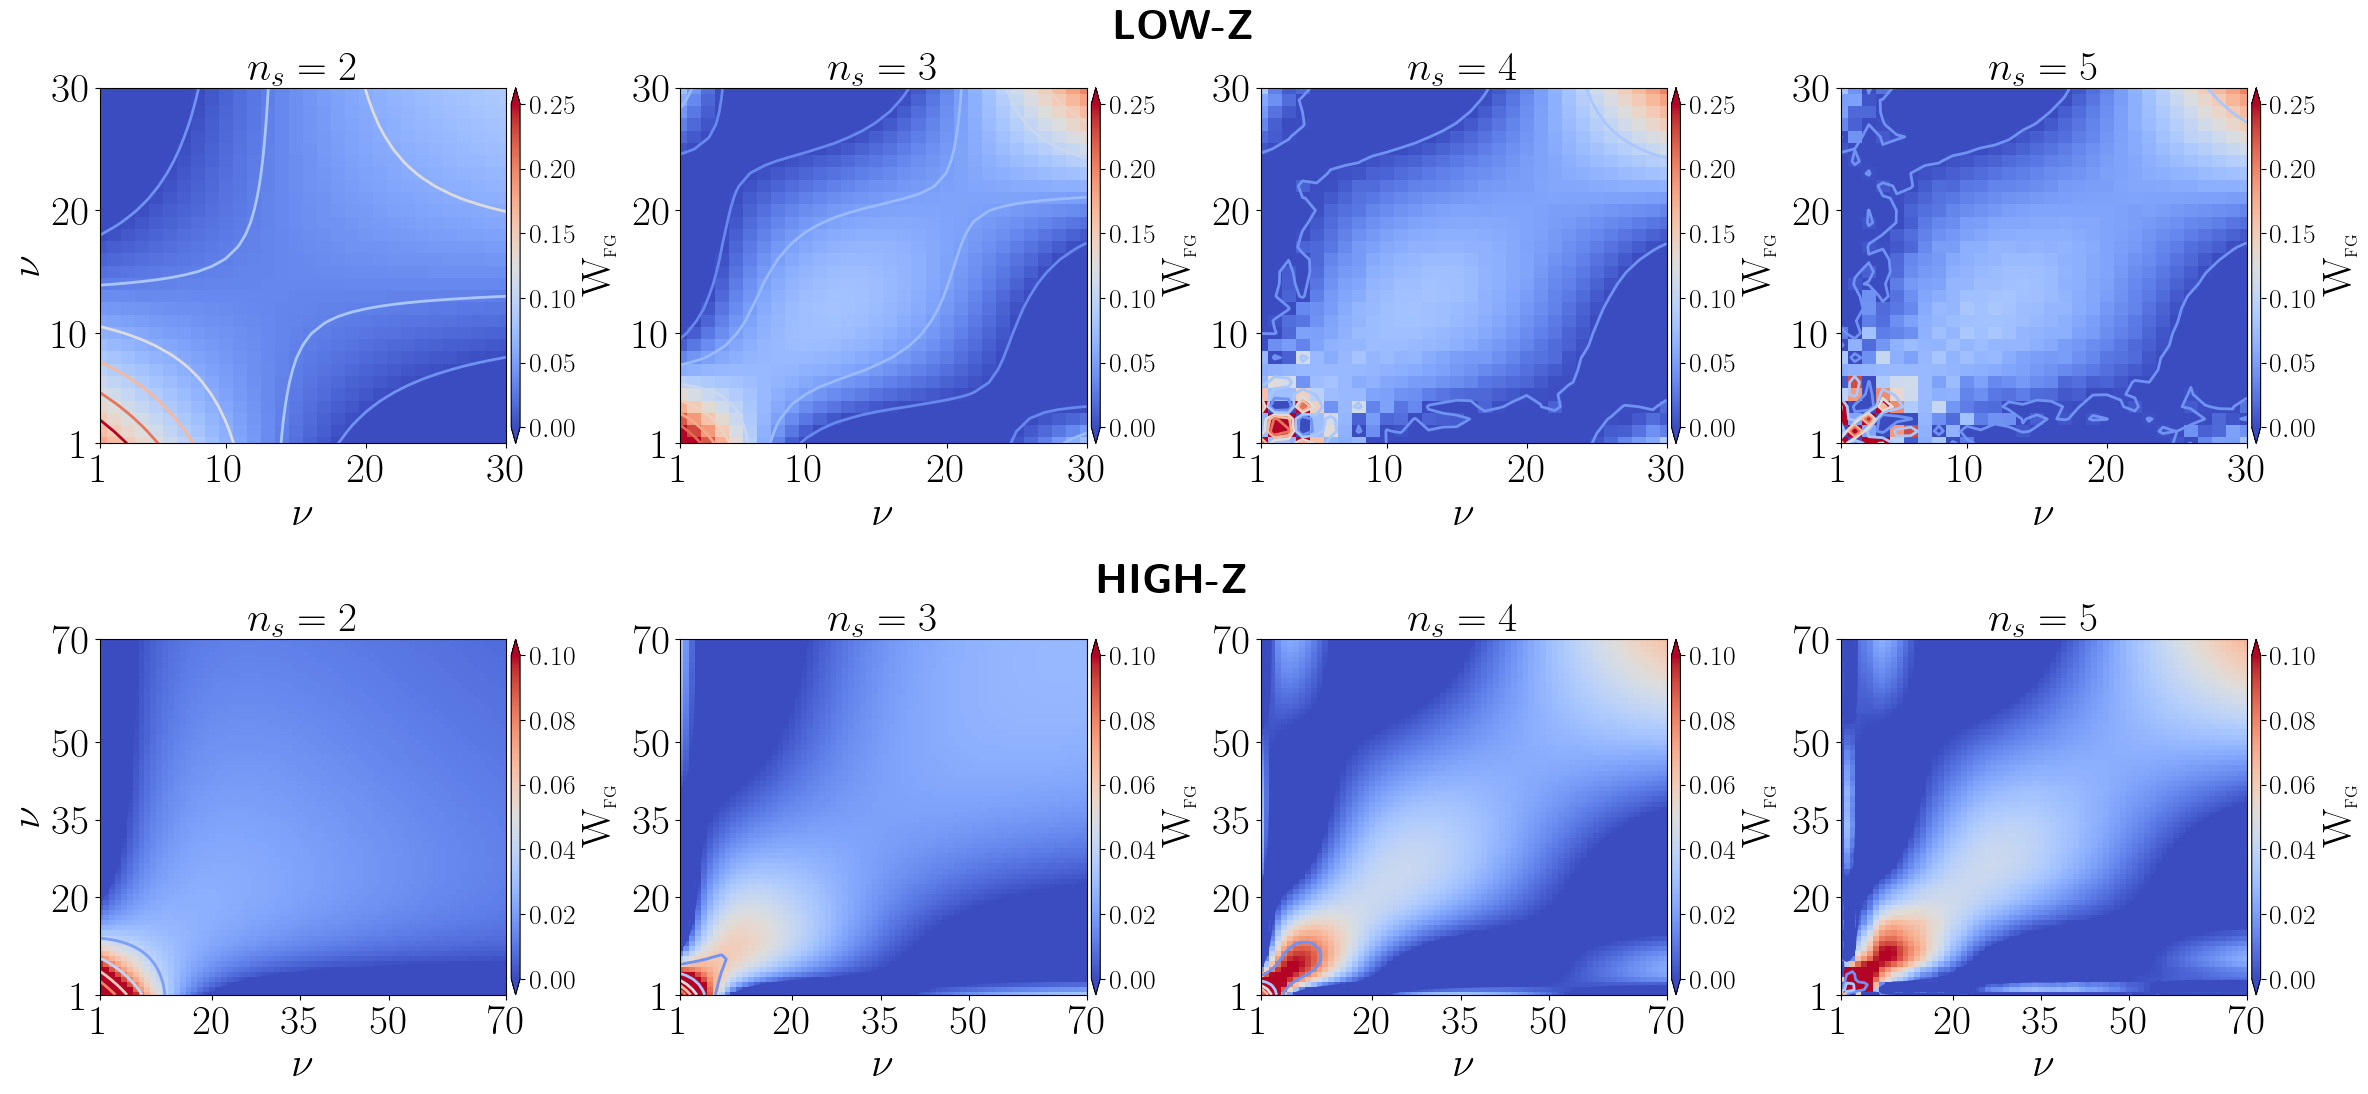

In [4]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [1,10,20,30]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=0.0, vmax=0.25)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0,1].text(x=32, y=34, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [1,20,35,50,70]
#CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=0.0, vmax=0.1)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[1,1].text(x=72, y=79, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
axes[0,0].set_ylabel(r'$\nu$', fontsize=30)
axes[1,0].set_ylabel(r'$\nu$', fontsize=30)
###########################################################
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_model1.png"
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

-2.8073555533425966e-10
9.795822222382678e-10
-8.629344444686667e-09
6.52344444526626e-10
6.686326530850357e-11
2.2779591835304098e-10
-2.743922449004159e-09
-2.9484183673728678e-09


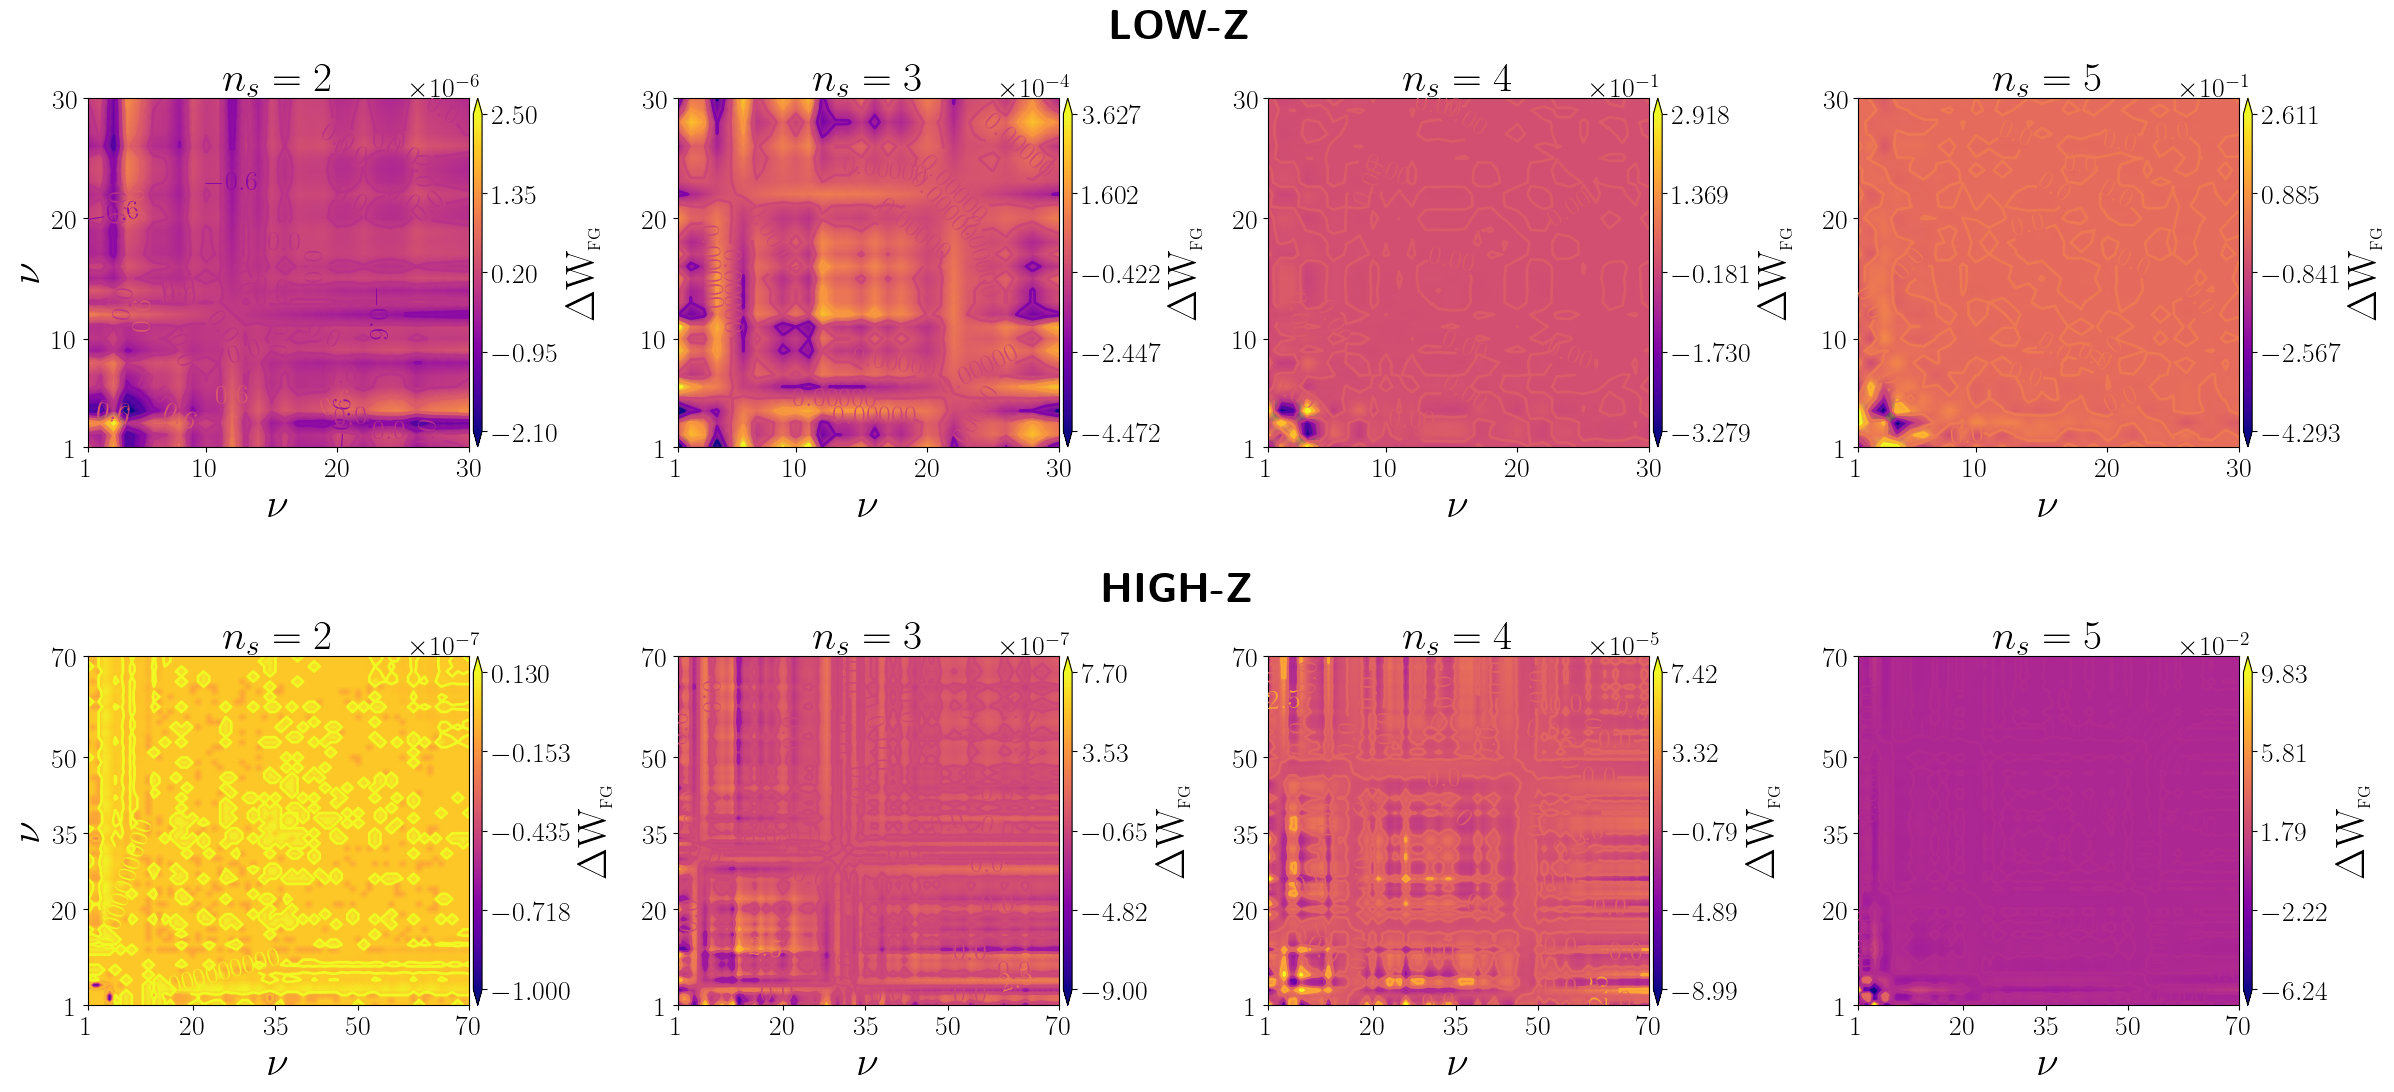

In [5]:
savefigs = False
############################################################################
ncols,nrows = len(WFG_dict.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.3,hspace=0.6)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [1,10,20,30]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    print(z.mean())    
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, shading='gouraud')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    ########
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right",format='%.1f')
    cbar.set_label(label=r'$\Delta\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ########
    cbar.set_ticks(np.linspace(iWfg.min(), iWfg.max(), 5))
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    ########
axes[0,1].text(x=34, y=35, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [1,20,35,50,70]
CMAP = 'plasma'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean'])
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    print(z.mean())
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, shading='gouraud')
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    ########
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right",format='%.1f')
    cbar.set_label(label=r'$\Delta\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ########
    cbar.set_ticks(np.linspace(iWfg.min(), iWfg.max(), 5))
    cbar.formatter = ScalarFormatter(useMathText=True)
    cbar.formatter.set_scientific(True)
    cbar.formatter.set_powerlimits((0, 0))
    cbar.update_ticks()
    ########
axes[1,1].text(x=78, y=81, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
axes[0,0].set_ylabel(r'$\nu$', fontsize=30)
axes[1,0].set_ylabel(r'$\nu$', fontsize=30)
###########################################################
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_diff.png"
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
#pathname

$\Delta\textbf{W}_{\textrm{FG}} = \textbf{W}_{\textrm{FG}} - \langle \textbf{W}_{\textrm{FG}} \rangle$

/tmp/ipykernel_2311222/506356482.py:18: RuntimeWarning: divide by zero encountered in log
  z   = np.log(iWfg)#+1e-20)
/tmp/ipykernel_2311222/506356482.py:57: RuntimeWarning: divide by zero encountered in log
  z   = np.log(iWfg)#+1e-20)


'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png'

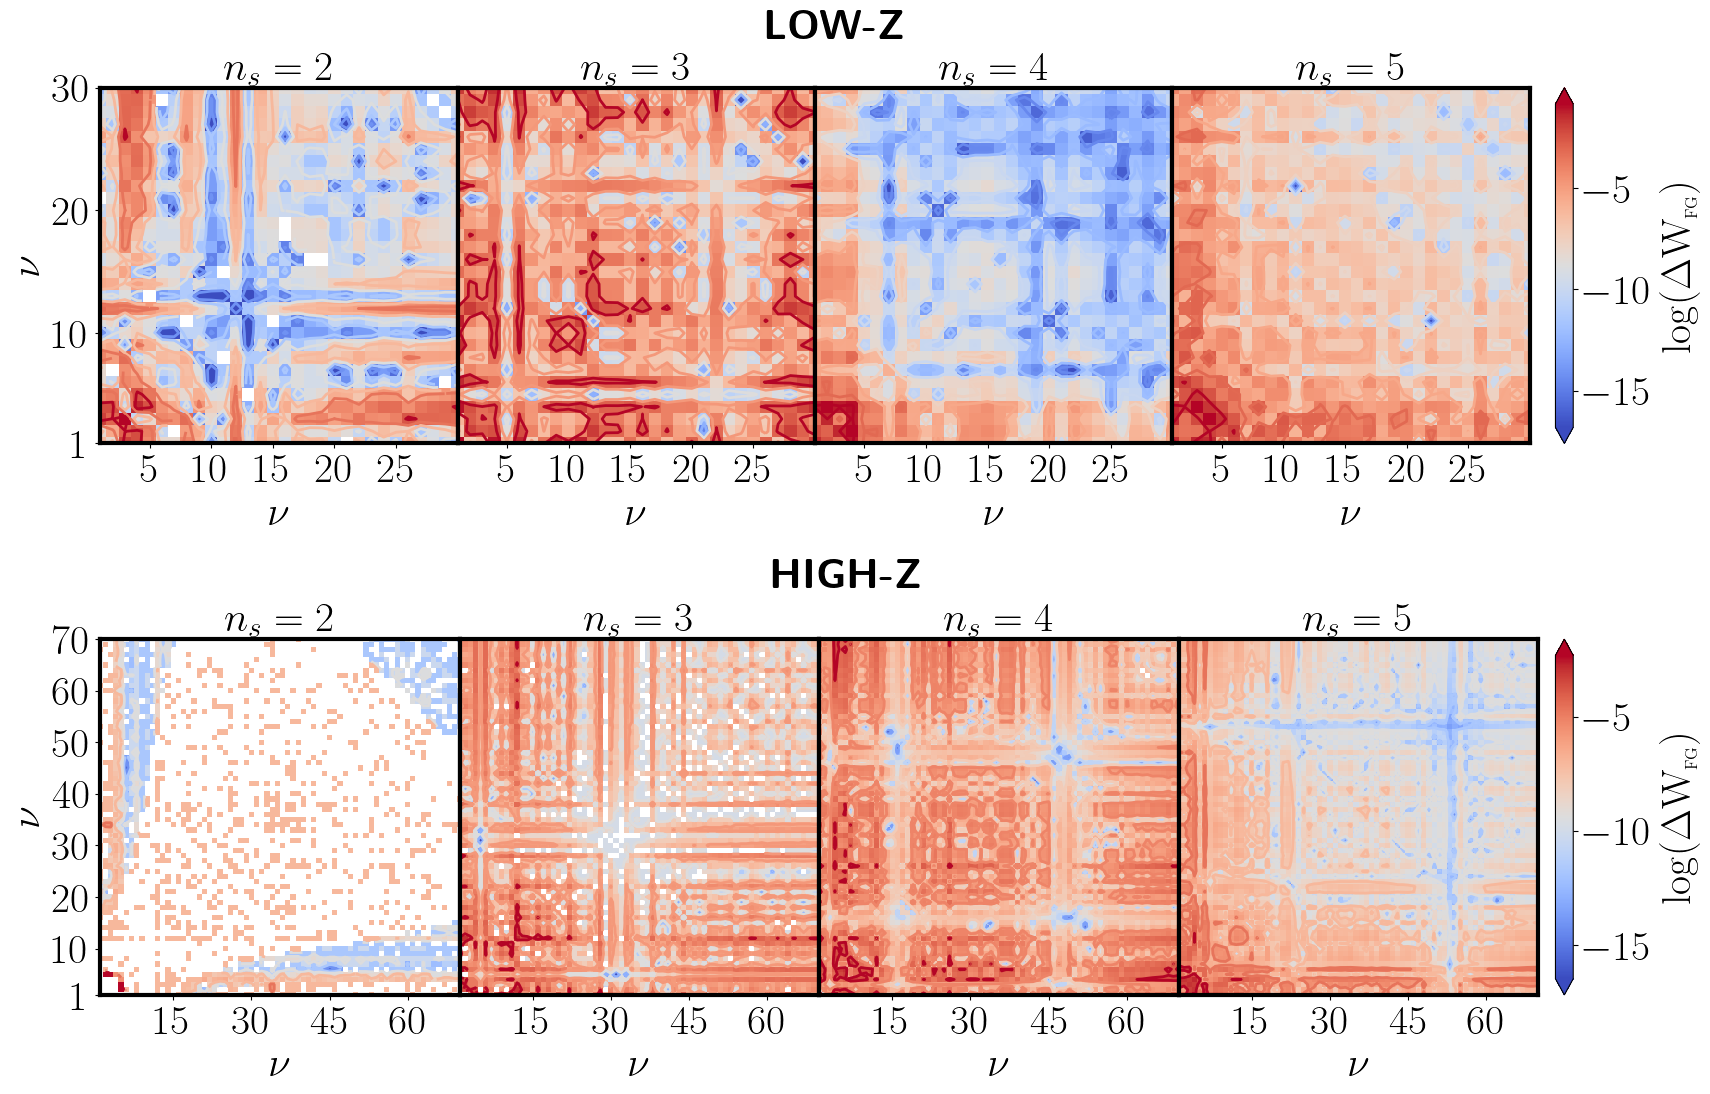

In [26]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),2
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.7, wspace=0.0,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
bwidth=3
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[0,ii] 
    iWfg = np.abs(dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean']))
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(iWfg)#+1e-20)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, )#vmin=np.log(1+0), vmax=np.log(1+0.3))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks(cticks)
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth)     
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0,0.05,0.10,0.15,0.20,0.25]
cbar = plt.colorbar(im, ax=axes[0,:],#ticks=cbticks,
                    extend='both',shrink=1.,pad=0.015,aspect=20, location="right")
#cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0,0]
cbar.set_label(label=r'$\log(\Delta\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
ax.set_yticks([1,10,20,30])
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0,0].text(x=55, y=34, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = [15,30,45,60]
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[1,ii] 
    iWfg = np.abs(dcopy(WFG_dict[ins]['W_fg_rec']-WFG_dict[ins]['W_fg_rec_mean']))
    x   = np.arange(iWfg.shape[0])+1
    y   = np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(iWfg)#+1e-20)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, )#vmin=np.log(1+0), vmax=np.log(1+0.1))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks(cticks)
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth) 
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0,0.02,0.04,0.06,0.08,0.1]
cbar = plt.colorbar(im, ax=axes[1,:],#ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
#cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[1,0]
cbar.set_label(label=r'$\log(\Delta\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
ax.set_yticks([1,10,20,30,40,50,60,70])
ax.set_ylabel( r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[1,0].text(x=130, y=80, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
pathname ="/data/AMARINS/CMBWLxHI-CODES/images/FG_filters.png"
#if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

## PLOTS range constrained

### PAPER's Figure 8

#### - Row 20

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch19__17_23.png'

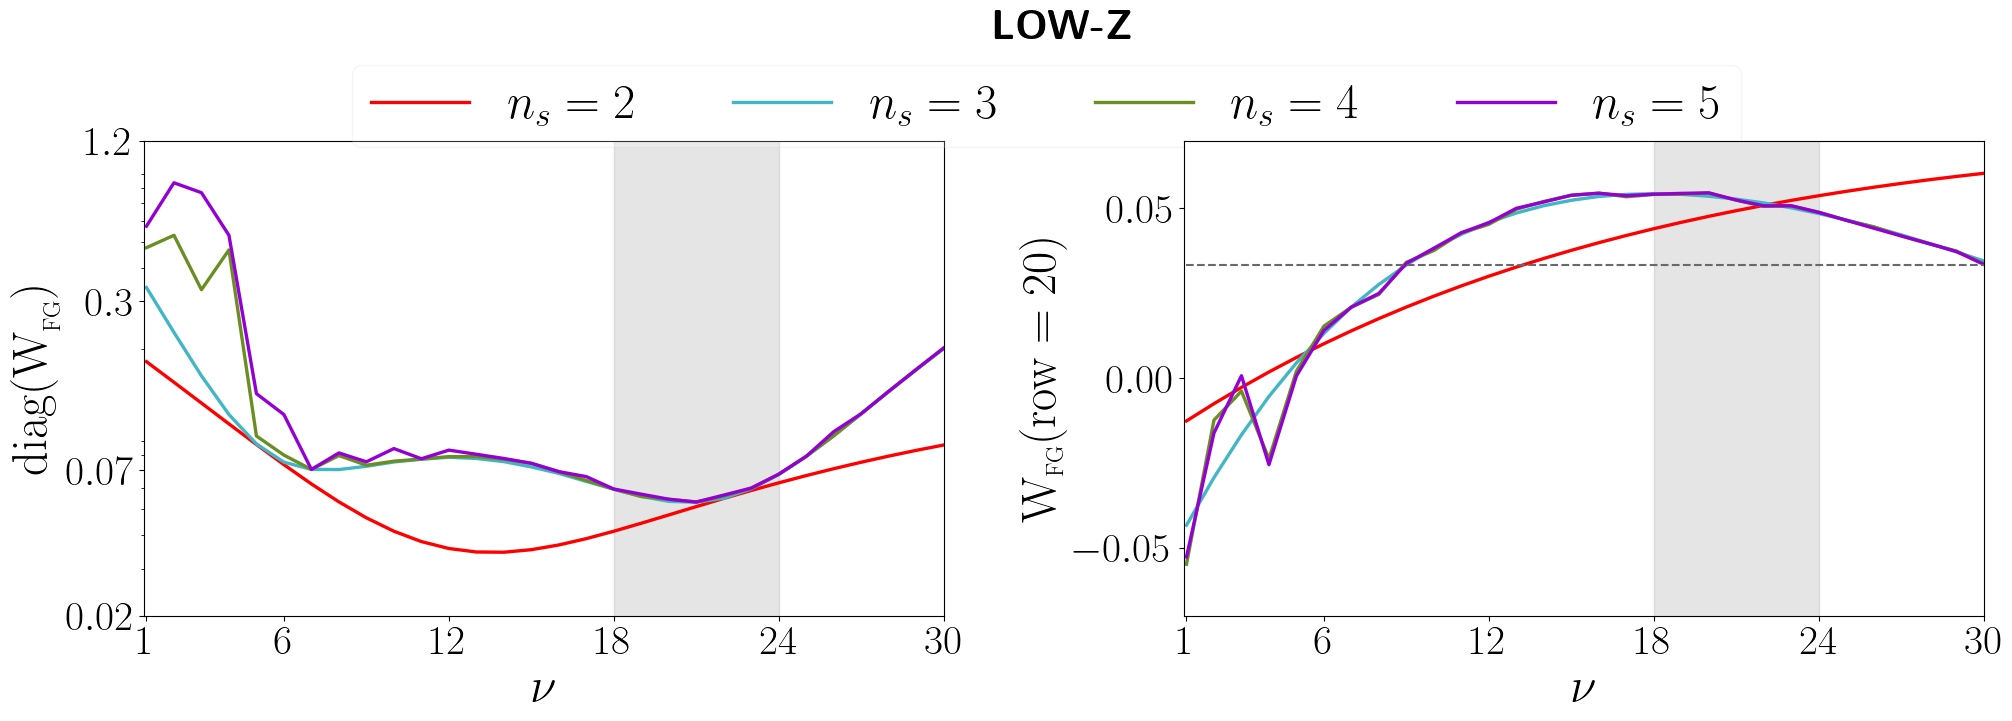

In [182]:
savefigs = True
############################################################################
i=19 ##row
nch    = 30
nu_min = 17
nu_max = 23
#

#
bins_lowz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = [1, 6, 12, 18, 24, 30]
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=3, wspace=0.3)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
#ax.axvline(x=bins_lowz.min()+1, color='darkgrey', ls='dashed')
#ax.axvline(x=bins_lowz.max()+1, color='darkgrey', ls='dashed')
ax.fill_between(bins_lowz+1, -0.07, 2, color='C27', alpha=0.2)        
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(2e-2,1)
ax.set_xticks(cticks)
cyticks = [0.02, 0.07, 0.3, 1.2]
ax.set_yticks(cyticks)
ax.set_yticklabels([r'${}$'.format(s) for s in cyticks]) 
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{\LARGE FG}})$', fontsize=35)
ax.set_xlabel(r'$\nu$', fontsize=35)
ax.legend(ncols=4, fontsize=35, loc='upper left',framealpha=0.2, bbox_to_anchor=(0.23, 1.21))
#ax.legend(ncols=2, fontsize=25, loc='upper center',framealpha=0.4)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
#ax.axvline(x=bins_lowz.min()+1, color='darkgrey', ls='dashed')
#ax.axvline(x=bins_lowz.max()+1, color='darkgrey', ls='dashed')
ax.fill_between(bins_lowz+1, -0.08, 1, color='C27', alpha=0.2)    
####    
ax.set_xlim(0.9,30)
ax.set_ylim(-0.07,0.07)
ax.set_xticks(cticks)
#ax.set_yticks([-0.05,0.00,0.05,-])
ax.set_ylabel(r'$\textrm{W}_{\textrm{\LARGE FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=35)
ax.set_xlabel(r'$\nu$', fontsize=35)
#ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-6, y=1.0e-1, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

/tmp/ipykernel_102085/1039865322.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])


'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch19__17_23.png'

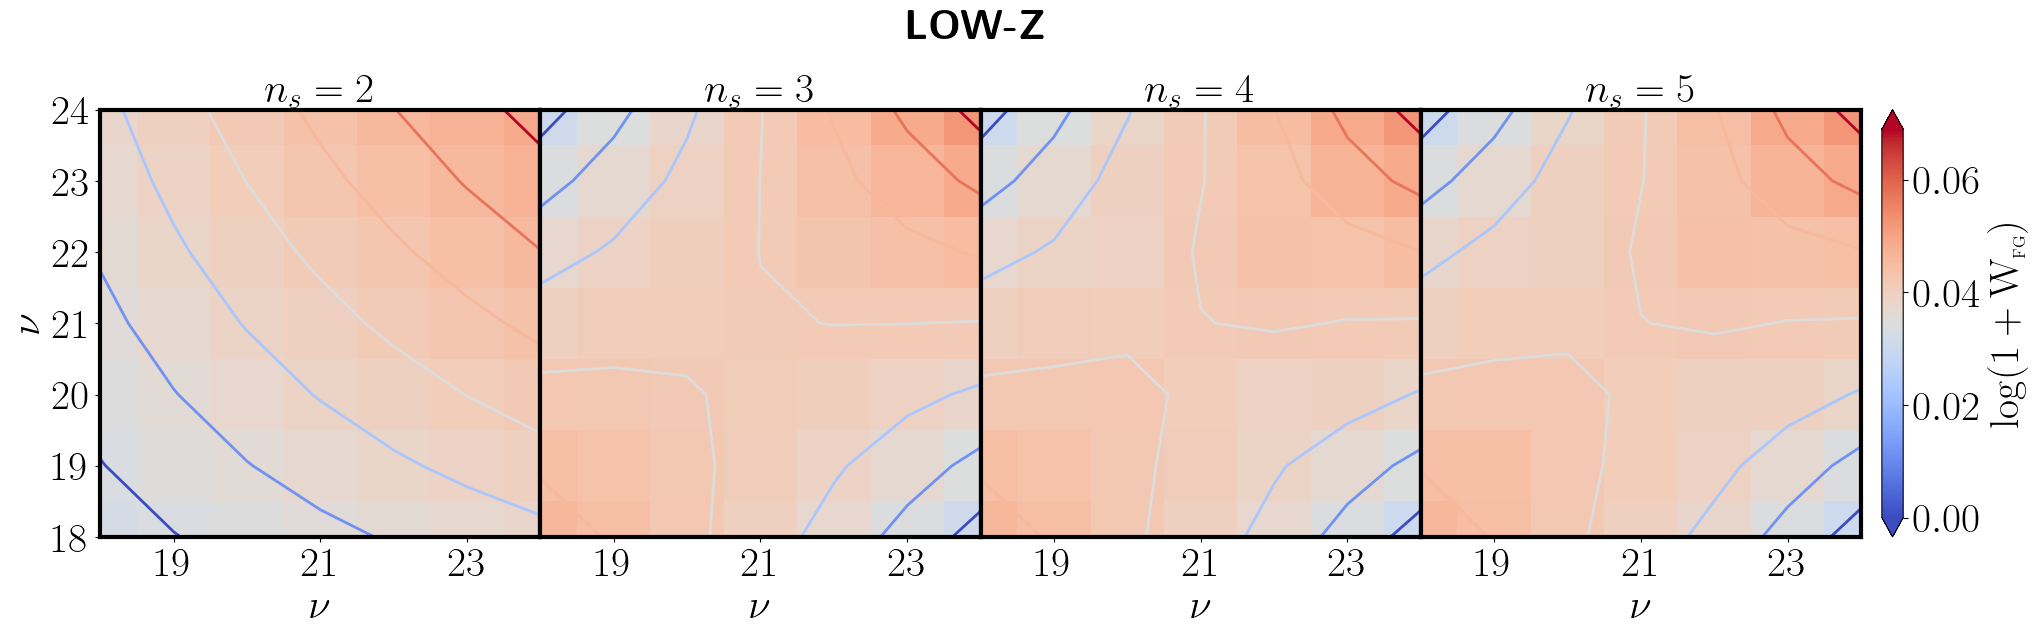

In [183]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.85, wspace=0.0,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
#cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
bwidth=3
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.09))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks([19,21,23])
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth)     
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0,0.02,0.04,0.06,0.08]
cbar = plt.colorbar(im, ax=axes[:],#ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
ax.set_yticks(cticks)
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0].text(x=30-1, y=25, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30});
############################################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch19__17_23_model1.png'

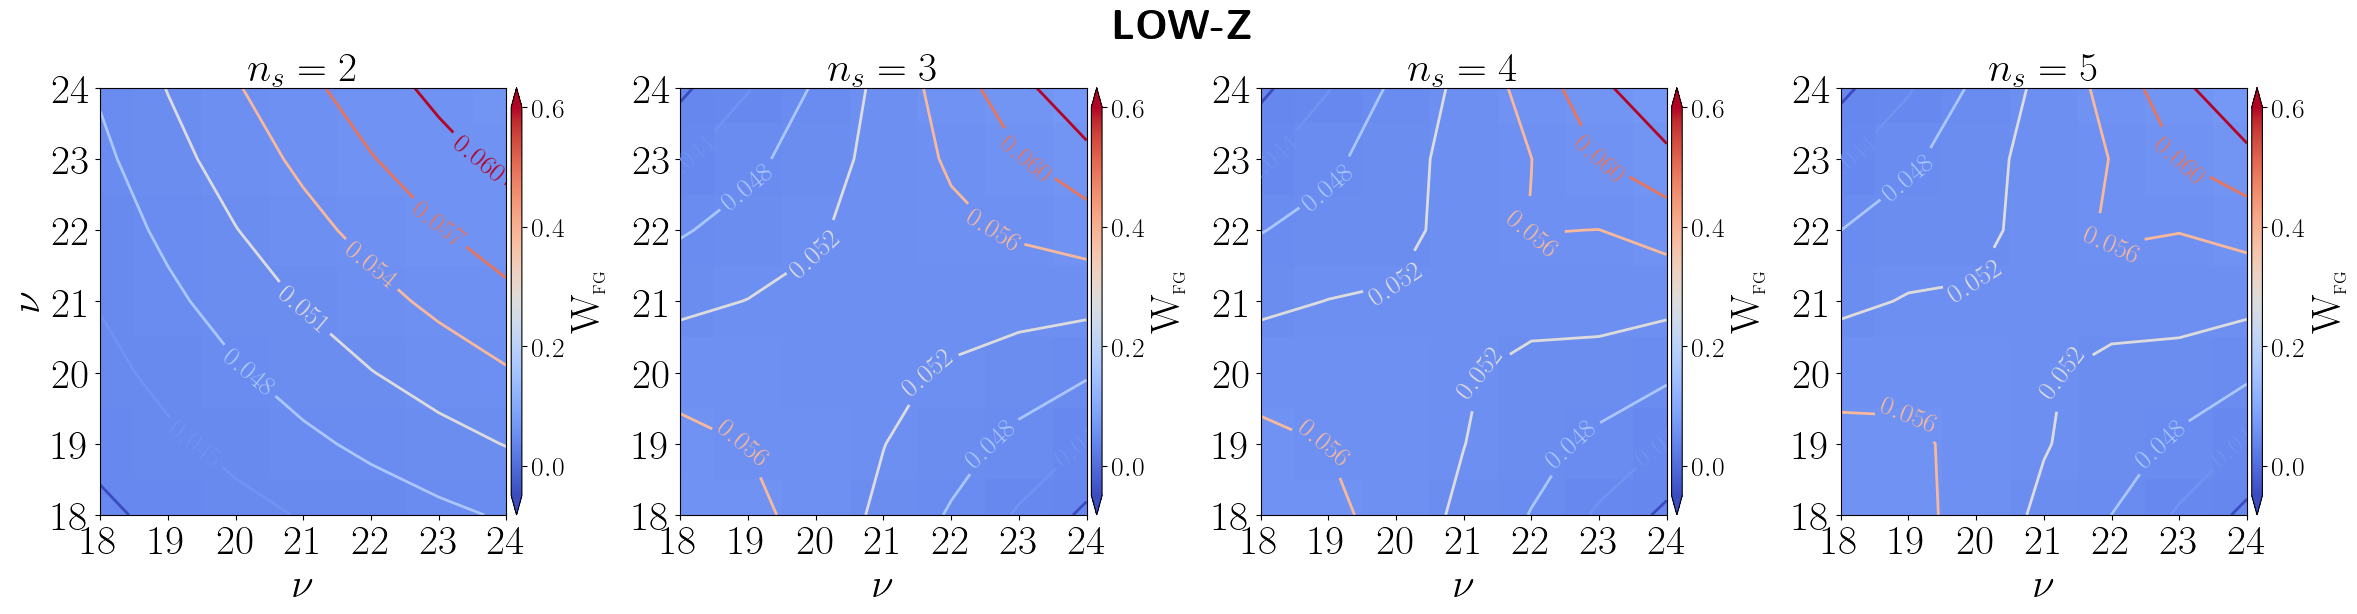

In [184]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=24.4, y=24.7, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}_model1.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

#### - Row = 25

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch24__24_29.png'

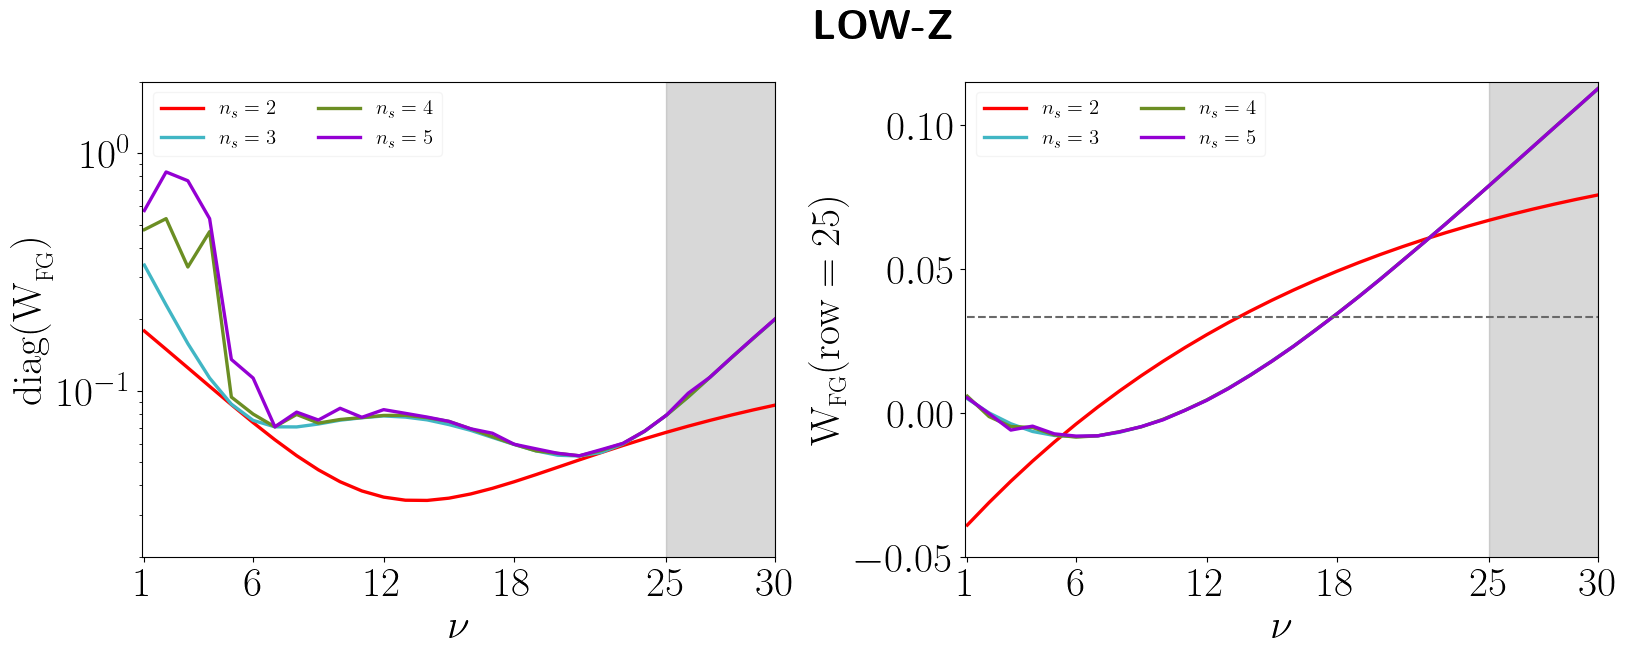

In [187]:
savefigs = True
############################################################################
i=24 ##row
nch    = 30
nu_min = 24
nu_max = 29
#
cticks = [1,6,12,18,25,30]
#
bins_lowz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_lowz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
#ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.07, 2, color='C27', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(2e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{\LARGE FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
#ax.axvline(x=bins_lowz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_lowz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_lowz+1, -0.08, 1, color='C27', alpha=0.3)    
####    
ax.set_xlim(0.9,30)
ax.set_ylim(-0.05,0.115)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{\LARGE FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-6, y=1.3e-1, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

/tmp/ipykernel_102085/1434608639.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])


'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch24__24_29.png'

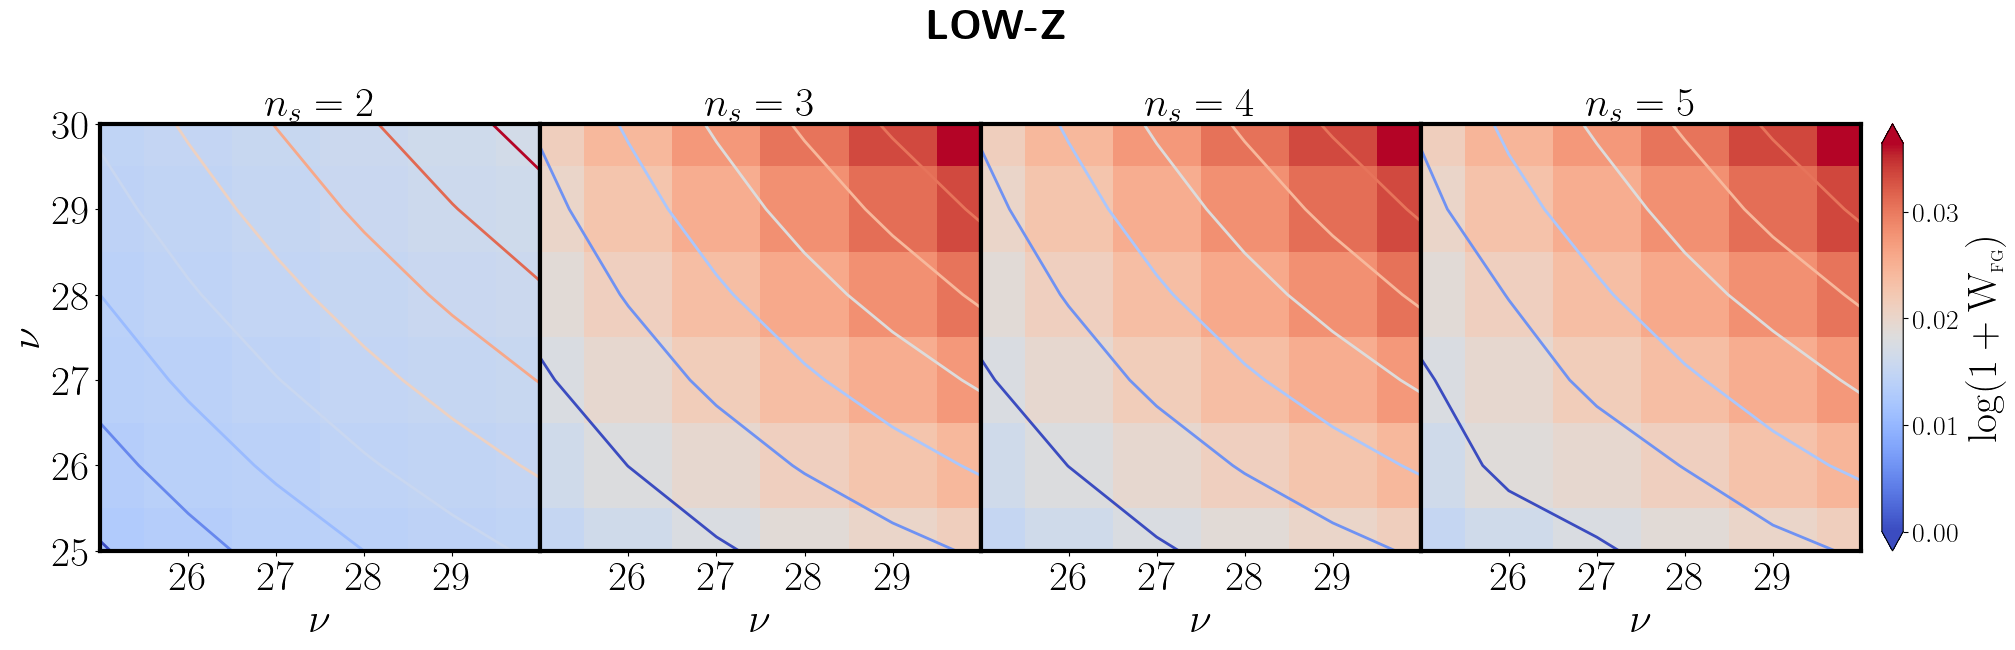

In [188]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.85, wspace=0.0,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
#cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
bwidth=3
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.2))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks([26, 27,28, 29])
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth)     
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0, 0.01, 0.02,  0.03]
cbar = plt.colorbar(im, ax=axes[:],#ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=20) 
ax.set_yticks(cticks)
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0].text(x=34.4, y=31, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30});
############################################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch24__24_29_model1.png'

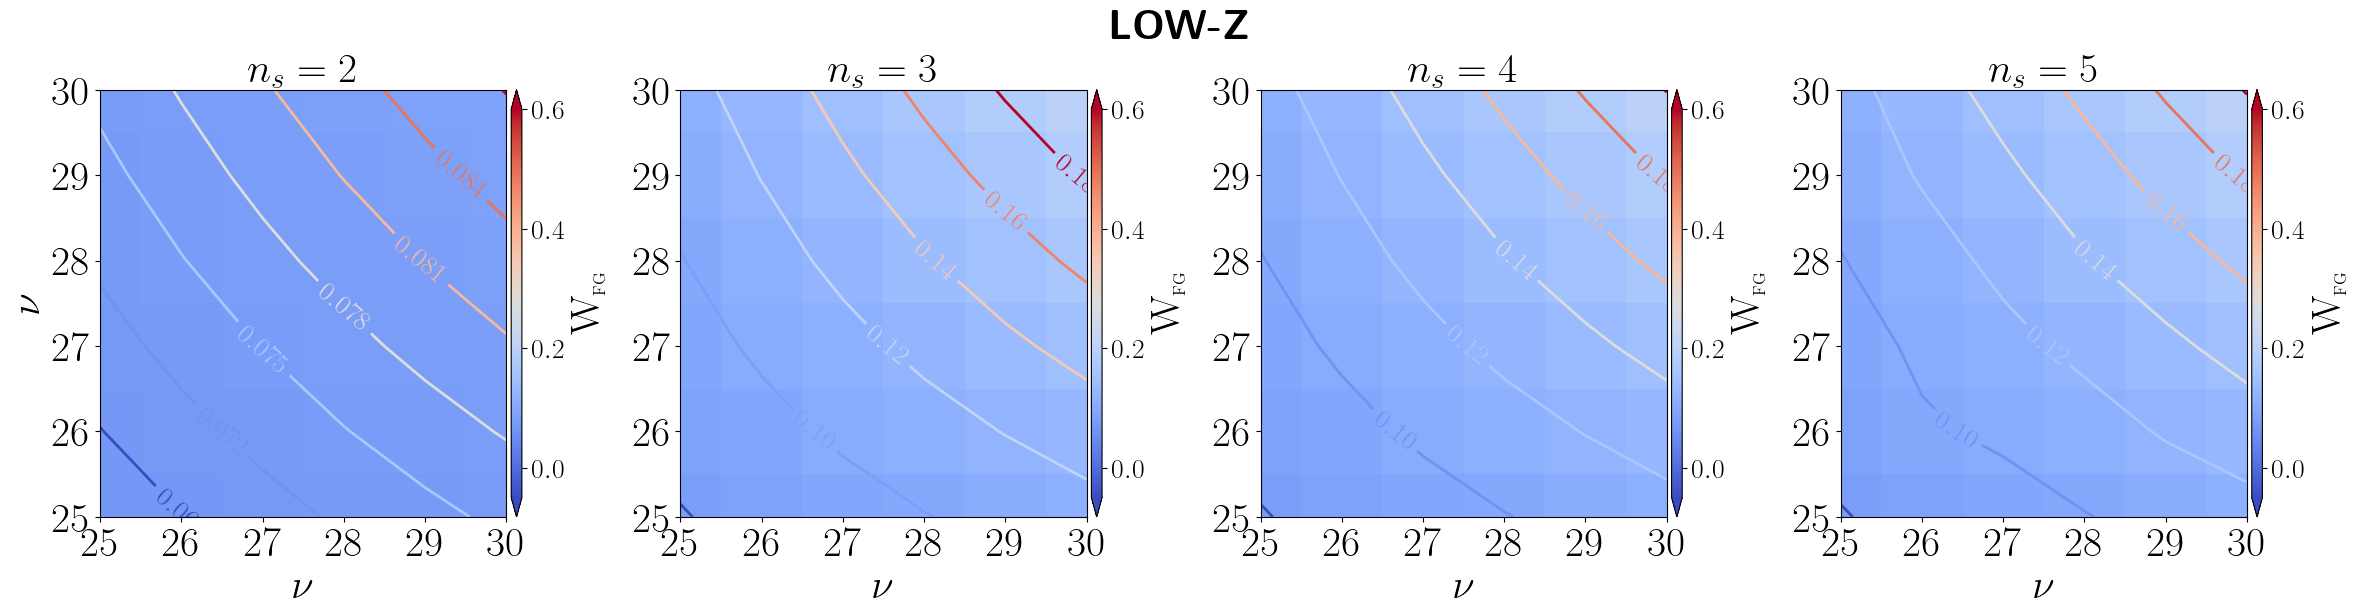

In [189]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_lowz)
cticks   = bins_lowz+1#[1,10,20,30]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_lowz.min():bins_lowz.max()+1,bins_lowz.min():bins_lowz.max()+1]
    x   = bins_lowz+1#np.arange(iWfg.shape[0])+1
    y   = bins_lowz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=30.3, y=30.6, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}_model1.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

### PAPER's Figure 9

#### - Row 48

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch47__45_50.png'

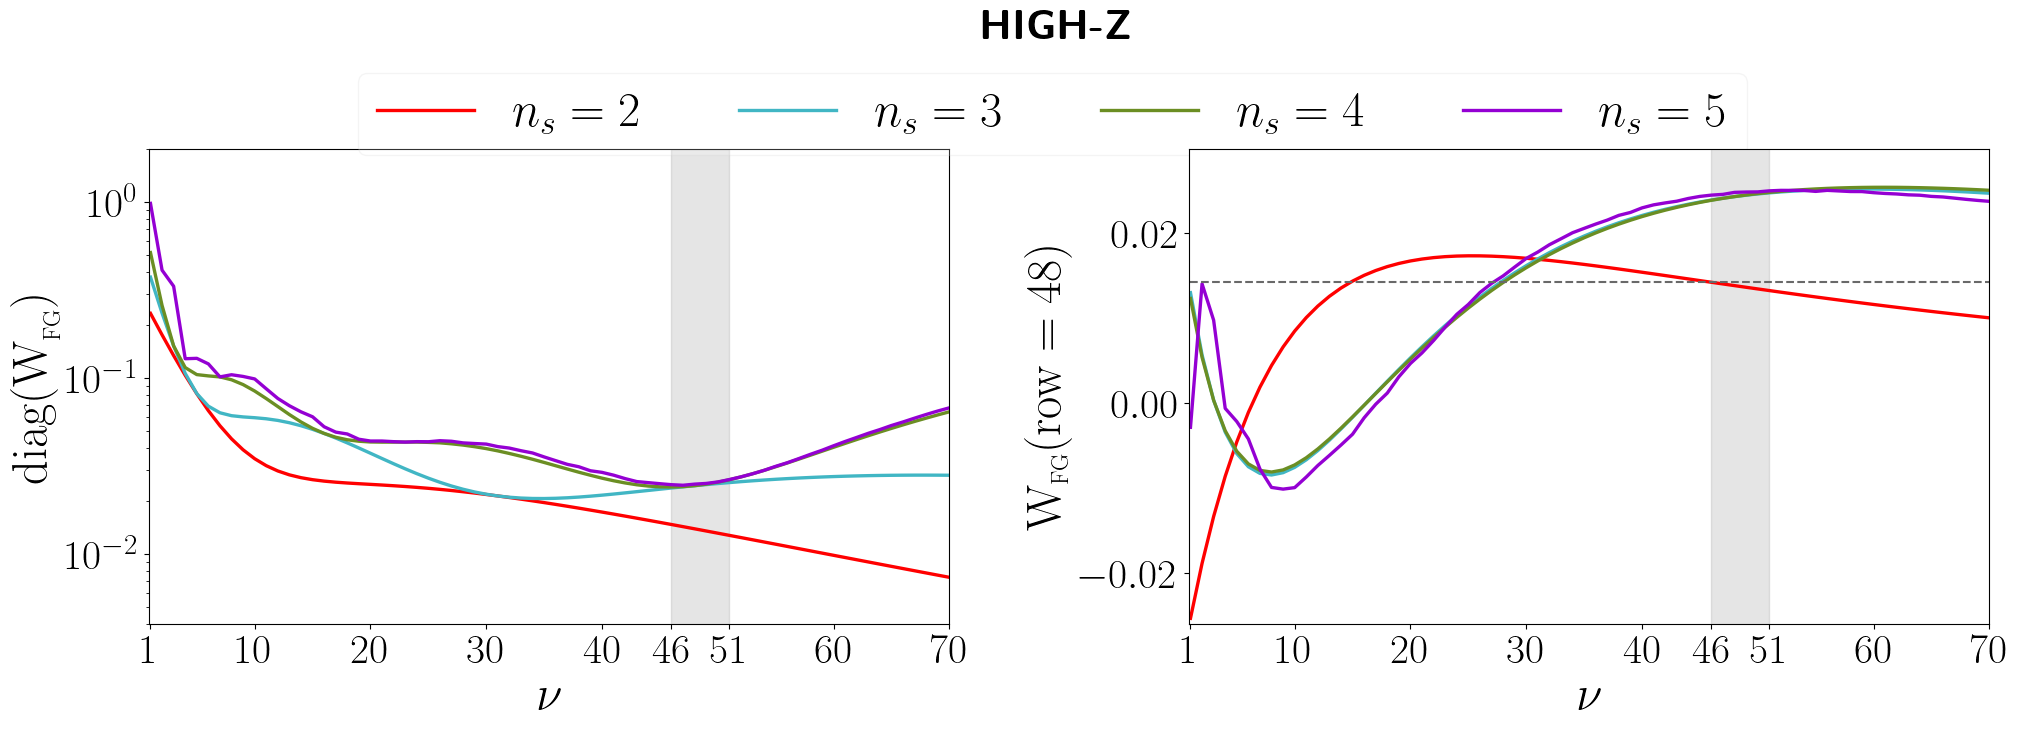

In [201]:
savefigs = True
############################################################################
i=47   ##row
nch    = 70
nu_min = 45
nu_max = 50
#
cticks = [1,10,20,30,40,46,51,60,70]
#
bins_highz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_highz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=3, wspace=0.3)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
#ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.07, 2, color='C27', alpha=0.2)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(0.4e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{\LARGE FG}})$', fontsize=35)
ax.set_xlabel(r'$\nu$', fontsize=35)
ax.legend(ncols=4, fontsize=35, loc='upper left',framealpha=0.2, bbox_to_anchor=(0.23, 1.21))
#ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
#ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.08, 1, color='C27', alpha=0.2)    
####    
ax.set_xlim(0.9,nch)
ax.set_ylim(-0.026,0.03)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{\LARGE FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=35)
ax.set_xlabel(r'$\nu$', fontsize=35)
#ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-17, y=0.43e-1, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch47__45_50.png'

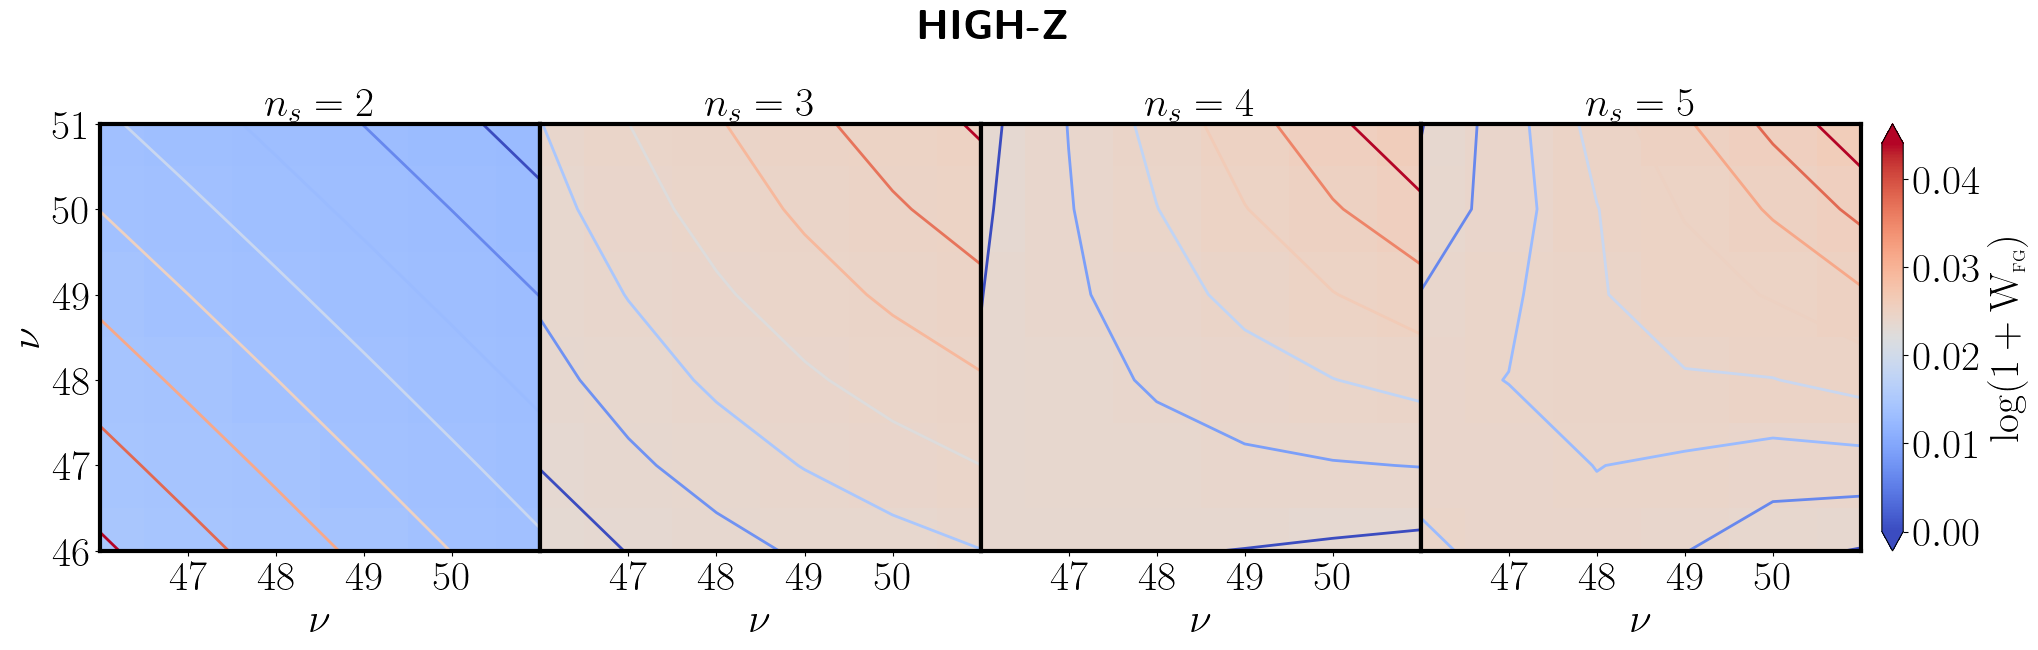

In [192]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.85, wspace=0.0,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = bins_highz+1#[1,10,20,30]
#cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
bwidth=3
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.045))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks([47,48,49,50])
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'   ].set_linewidth(bwidth)  
    ax.spines['bottom'].set_linewidth(bwidth)
    ax.spines['left'  ].set_linewidth(bwidth) 
    ax.spines['right' ].set_linewidth(bwidth)     
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0, 0.01, 0.02,  0.03, 0.04]
cbar = plt.colorbar(im, ax=axes[:],ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
#cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
#ax.set_yticks(cticks)
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0].text(x=55.3, y=52, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30});
############################################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch47__45_50_model1.png'

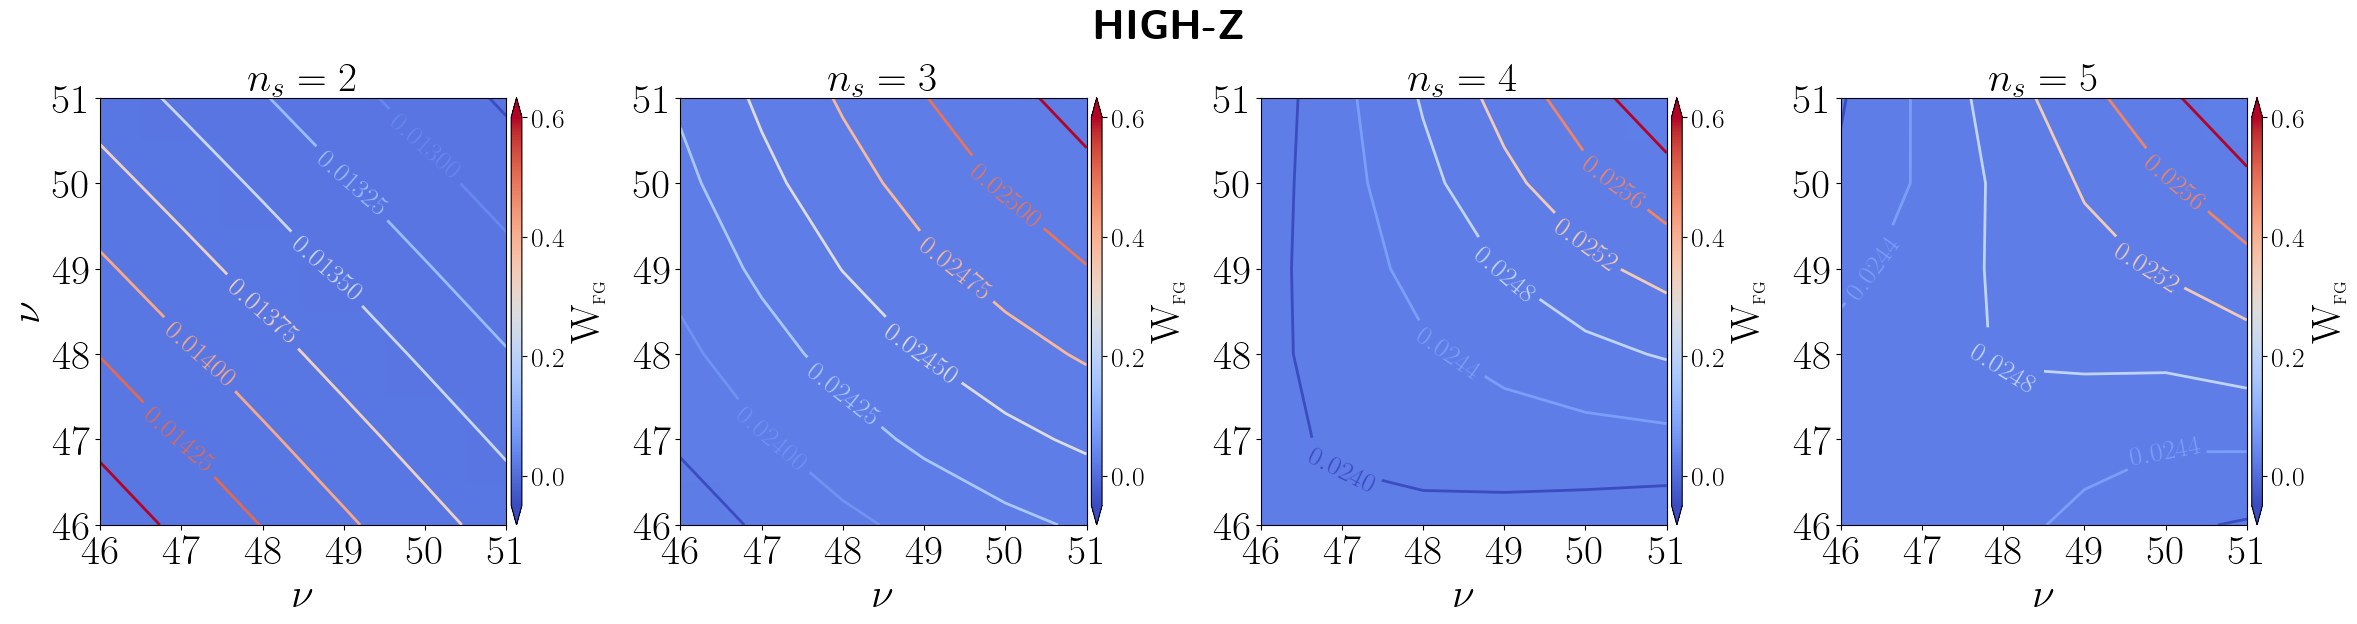

In [193]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = bins_highz+1#[1,10,20,30]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=51.1, y=51.7, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}_model1.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

#### - Row 70

'/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch69__64_69.png'

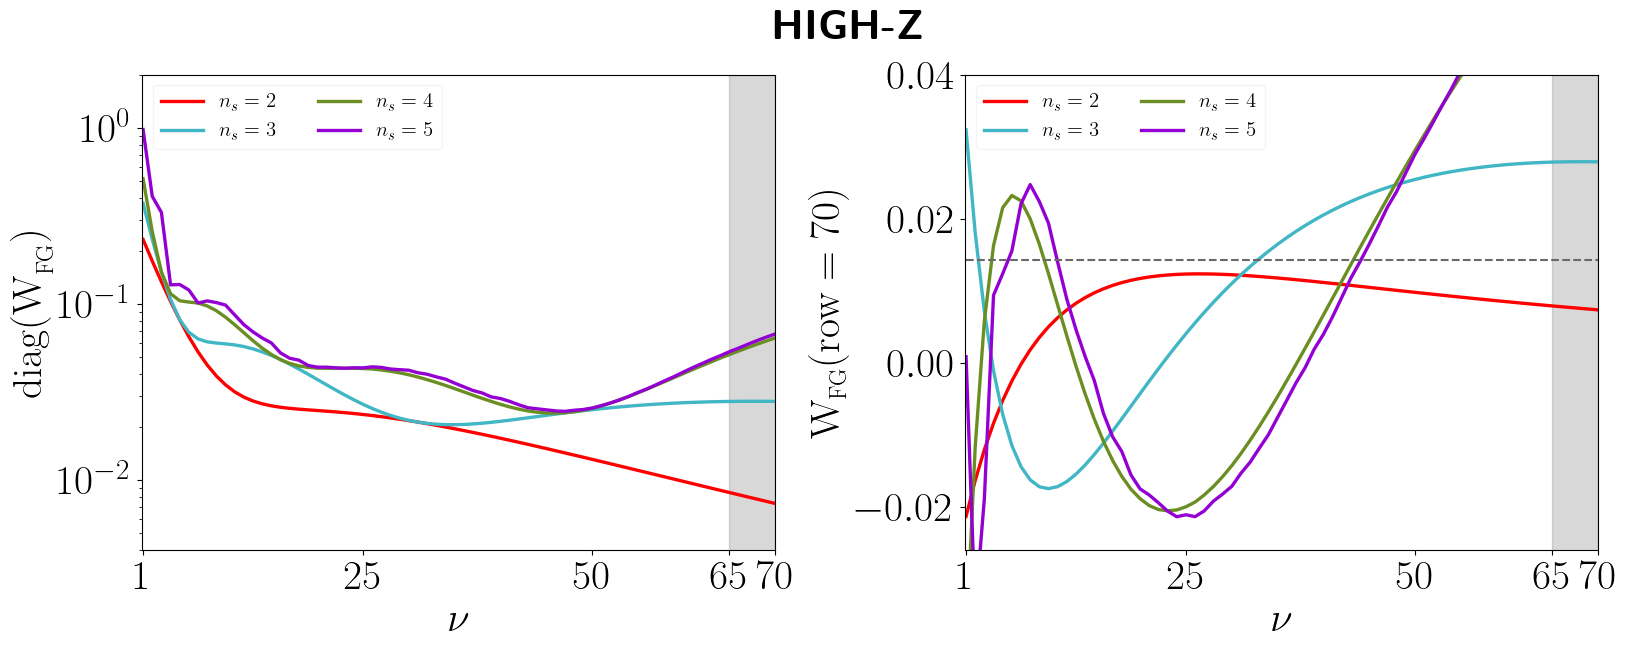

In [195]:
savefigs = True
############################################################################
i=69   ##row
nch    = 70
nu_min = 65-1
nu_max = 70-1
#
cticks = [1,25,50,65,70]
#
bins_highz = np.arange(nch)[nu_min:nu_max+1]
WFG_dict = dcopy(WFG_dict_highz)
####################################################################
fig, axes = plt.subplots(1,2)#, figsize=(18,6))
plt.subplots_adjust(top=1.1,right=2.4, wspace=0.3, hspace=0.35)
ax = axes[0]
############
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1,np.diag(iWfg),lw=2.4, c=my_cmap(ii),label=r'$n_s ='+'{}$'.format(ins.split('ns')[1]))#,  c='purple')
#ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.07, 2, color='C27', alpha=0.3)    
####    
ax.set_xscale('linear'); ax.set_yscale('log')
ax.set_xlim(0.9,30)
ax.set_ylim(0.4e-2,2)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{diag(W}_{\textrm{\LARGE FG}})$', fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####################################################################
ax = axes[1]
for ii, ins in enumerate(WFG_dict.keys()):
    iWfg   = dcopy(WFG_dict[ins]['W_fg_rec'])
    ax.plot(np.arange(iWfg[0].size)+1, iWfg[i,:]  , label=r'$n_s ='+'{}$'.format( ins.split('ns')[1]),  c=my_cmap(ii), lw=2.4)
ax.plot(np.arange(nch)+1, np.ones(nch)/nch, ls='dashed', c='dimgrey')    
#ax.axvline(x=bins_highz.min()+1, color='darkorange', ls='dashed')
#ax.axvline(x=bins_highz.max()+1, color='darkorange', ls='dashed')
ax.fill_between(bins_highz+1, -0.08, 1, color='C27', alpha=0.3)    
####    
ax.set_xlim(0.9,nch)
ax.set_ylim(-0.026,0.04)
ax.set_xticks(cticks)
ax.set_ylabel(r'$\textrm{W}_{\textrm{\LARGE FG}} (\textrm{row}' + '={})$'.format(i+1) , fontsize=30)
ax.set_xlabel(r'$\nu$', fontsize=30)
ax.legend(ncols=2, fontsize=15, loc='upper left',framealpha=0.2)
ax.tick_params(axis='both', labelsize=30)
####
ax.text(x=-20, y=0.45e-1, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/Wfg_ns_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch69__64_69.png'

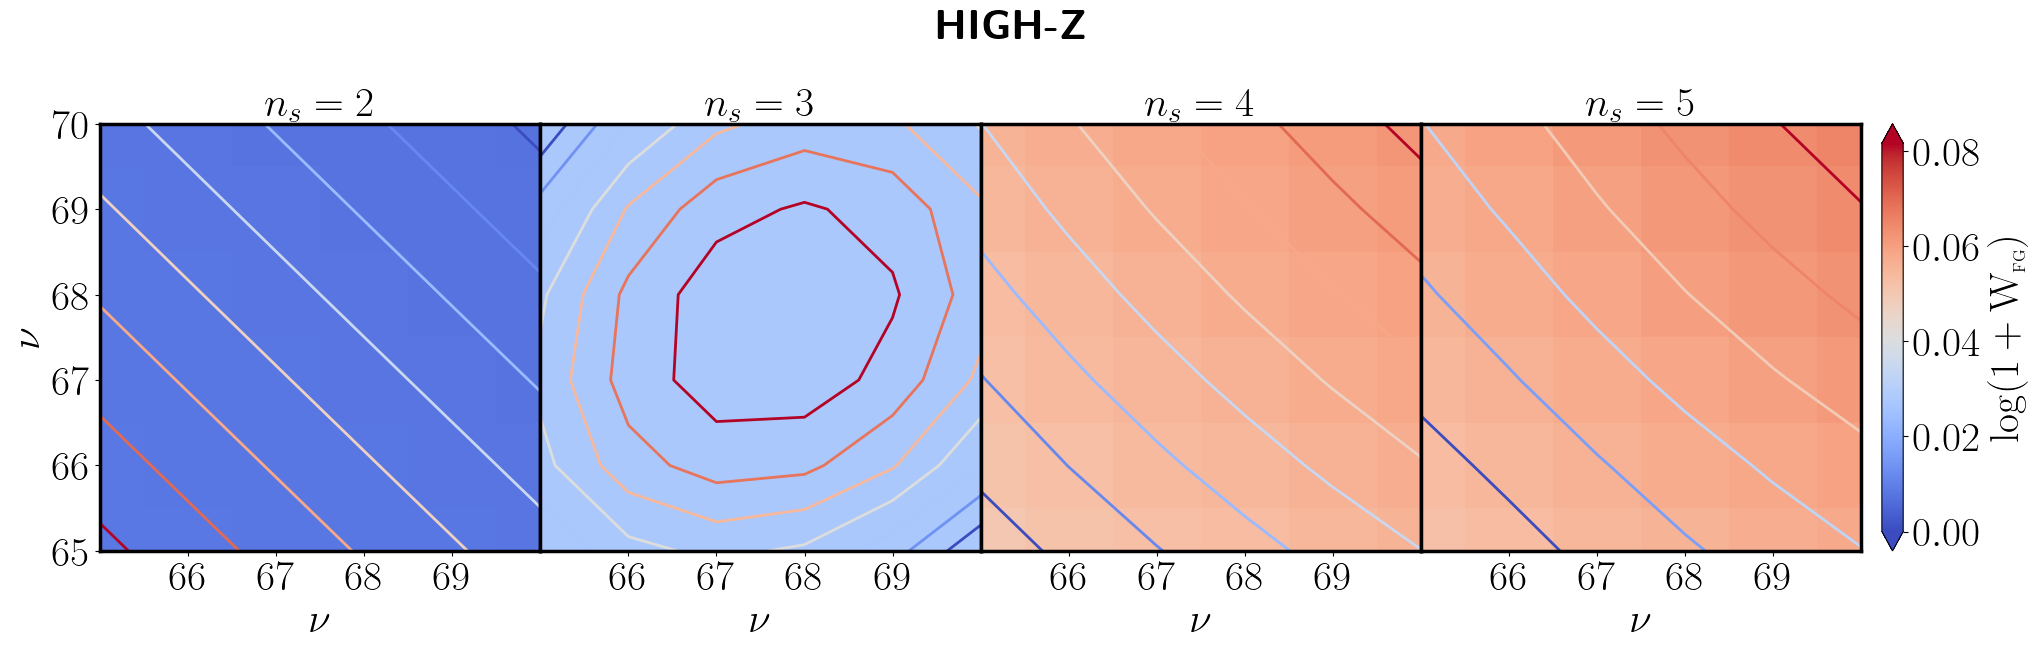

In [196]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.85, wspace=0,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
bwidth=2.5
cticks   = bins_highz+1#[1,10,20,30]
#cticks   = [5,10,15,20,25]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = np.log(1+iWfg)
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP, vmin=np.log(1+0), vmax=np.log(1+0.085))
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    if ii: ax.set_yticks([])
    ax.set_xticks([66,67,68,69])
    ax.tick_params(axis='x', labelsize=30)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.spines['top'].set_linewidth(bwidth)  # Top border
    ax.spines['bottom'].set_linewidth(bwidth)  # Top border
    ax.spines['left'].set_linewidth(bwidth)  # Top border
    ax.spines['right'].set_linewidth(bwidth)  # Top border
    #ax.clabel(CS, inline=True, fontsize=20)
    #CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
##
cbticks=[0, 0.02, 0.04,  0.06, 0.08]
cbar = plt.colorbar(im, ax=axes[:],ticks=cbticks,
                    extend='both',shrink=1.,pad=0.01,aspect=20, location="right")
#cbar.ax.set_yticklabels([r'${:.2f}$'.format(c) for c in cbticks])
##
ax = axes[0]
cbar.set_label(label=r'$\log(1+\textrm{W}_{\textrm{\large FG}})$', fontsize=30)
cbar.ax.tick_params(labelsize=30) 
#ax.set_yticks(cticks)
ax.set_ylabel(r'$\nu$', fontsize=30)
ax.tick_params(axis='y', labelsize=30)
axes[0].text(x=74.5, y=71, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30});
############################################################################
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

'/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch69__64_69_model1.png'

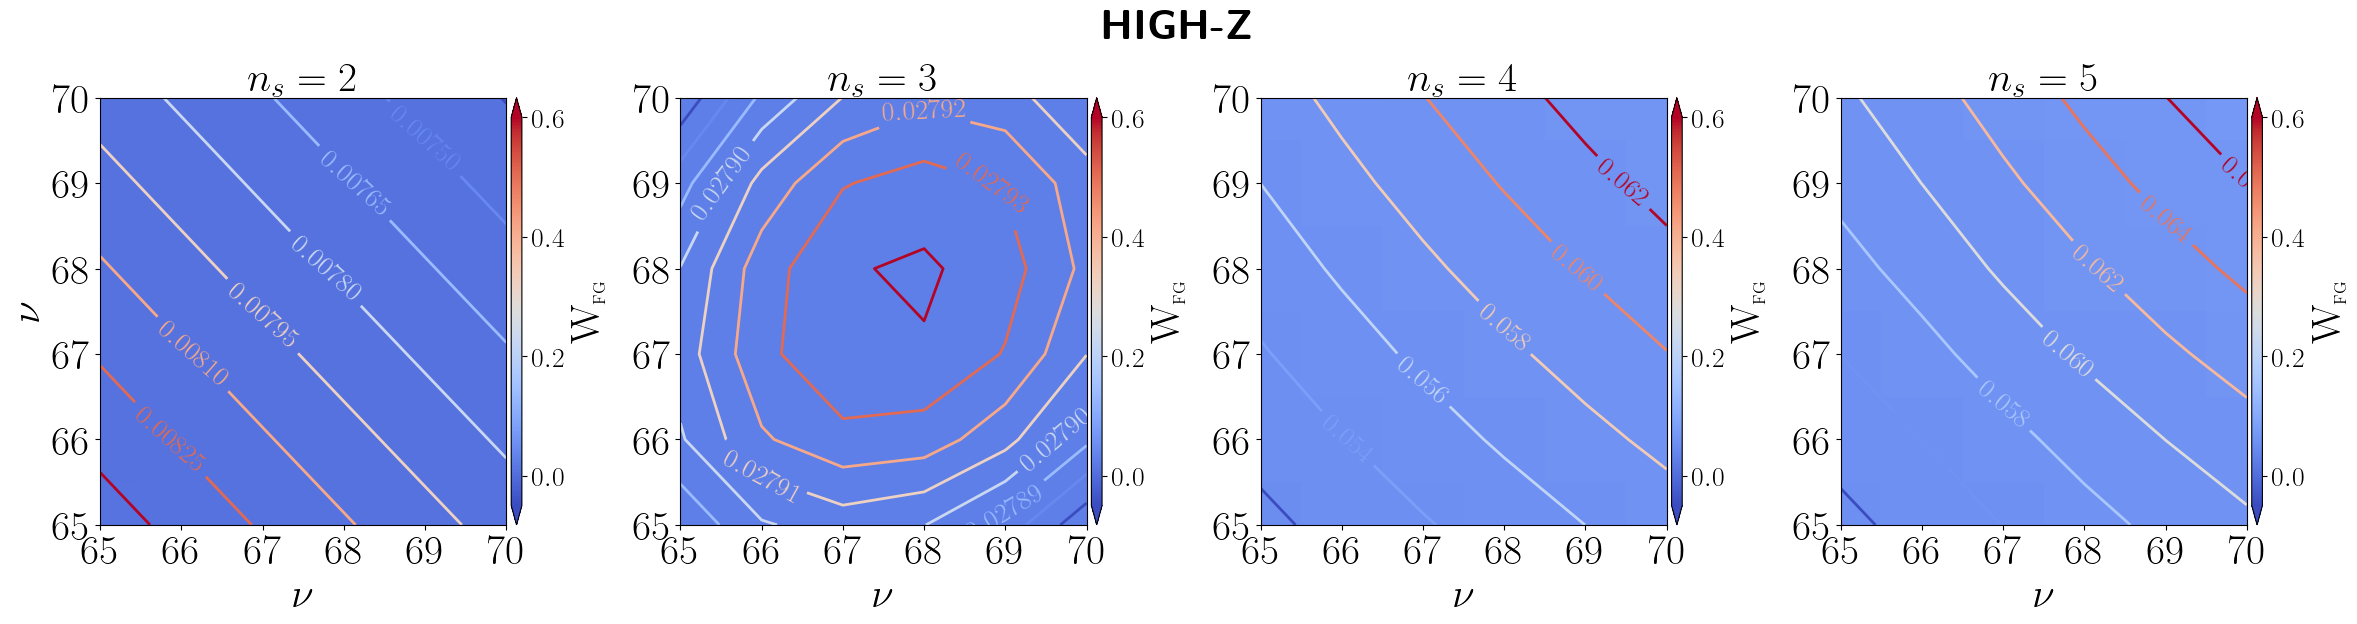

In [197]:
savefigs = True
############################################################################
ncols,nrows = len(WFG_dict_lowz.keys()),1
fig, axes   = plt.subplots(nrows=nrows, ncols=ncols)
fig.subplots_adjust(top=nrows*1.,right=ncols*0.9, wspace=0.2,hspace=0.55)
############################################################################
WFG_dict = dcopy(WFG_dict_highz)
cticks   = bins_highz+1#[1,10,20,30]
CMAP = 'coolwarm'
#######
for ii, ins in enumerate(WFG_dict.keys()):
    ax  = axes[ii] 
    iWfg = dcopy(WFG_dict[ins]['W_fg_rec'])[bins_highz.min():bins_highz.max()+1,bins_highz.min():bins_highz.max()+1]
    x   = bins_highz+1#np.arange(iWfg.shape[0])+1
    y   = bins_highz+1#np.arange(iWfg.shape[1])+1
    x,y = np.meshgrid(x, y)
    z   = iWfg
    #######
    im = ax.pcolormesh(x, y, z, cmap=CMAP,    vmin=-0.05, vmax=0.6)
    CS = ax.contour(   x, y, z, cmap=CMAP, extend='both',  linewidths=2,)
    ax.clabel(CS, inline=True, fontsize=20)
    CS = ax.contour(10*np.ones_like(x), 10*np.ones_like(x), 10*np.ones_like(x))
    ax.axis([x.min(), x.max(), y.min(), y.max()])
    cbar = plt.colorbar(im, ax=ax,extend='both',shrink=1.,pad=0.01,aspect=40, location="right")
    cbar.set_label(label=r'$\textrm{W}_{\textrm{\large FG}}$', fontsize=30)
    cbar.ax.tick_params(labelsize=20) 
    ax.set_xticks(cticks)
    ax.set_yticks(cticks)
    ax.set_title(r'$n_s = '+ins.split('ns')[1]+'$', fontsize=30)
    ax.set_xlabel(r'$\nu$', fontsize=30)
    ax.tick_params(axis='both', labelsize=30)
axes[0].set_ylabel(r'$\nu$', fontsize=30)    
axes[1].text(x=70.2, y=70.7, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color': None,  'weight': 'bold','size': 30})
####
pathname = '/data/AMARINS/CMBWLxHI-CODES/images/FG_filters_ch{}__{}_{}_model1.png'.format(i, nu_min, nu_max)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname